In [1]:
pip install numpy pandas tensorflow opencv-python matplotlib keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numpy matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.2 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 2.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.0 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.0 MB 2.6 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.0 MB 2.9 MB/s eta 0:00:02
   ---------------------------- ----------- 5.8/8.0 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 3.1 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 3.2 MB/s eta 0:00:01
   ------------------------------

  You can safely remove it manually.


In [3]:
pip install --upgrade opencv-python


In [4]:

pip install numpy matplotlib


In [5]:
pip install numpy pandas tensorflow opencv-python matplotlib keras


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split the data into training and validation
)

# Set up the training generator
train_generator = train_datagen.flow_from_directory(
    r"F:\Final Year Project FINAL\Model Training Files\Rice Seed Dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

# Set up the validation generator
validation_generator = train_datagen.flow_from_directory(
    r"F:\Final Year Project FINAL\Model Training Files\Rice Seed Dataset",  # Correct directory for validation
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)

# Display the number of samples for each class in the training set
print("Training Set:")
for class_name, class_index in train_generator.class_indices.items():
    count = sum(train_generator.classes == class_index)
    print(f"{class_name}: {count} samples")

# Display the number of samples for each class in the validation set
print("\nValidation Set:")
for class_name, class_index in validation_generator.class_indices.items():
    count = sum(validation_generator.classes == class_index)
    print(f"{class_name}: {count} samples")

# Print the total samples and class distribution
print(f"\nTotal samples: {len(train_generator.filenames) + len(validation_generator.filenames)}")
print(f"Training samples: {len(train_generator.filenames)}")
print(f"Validation samples: {len(validation_generator.filenames)}")


Found 806 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Training Set:
Healthy_Images: 401 samples
Unhealthy_Images: 405 samples

Validation Set:
Healthy_Images: 100 samples
Unhealthy_Images: 101 samples

Total samples: 1007
Training samples: 806
Validation samples: 201


## Model Building

In [8]:
from keras import layers, callbacks, utils, applications, optimizers
from keras.models import Sequential, Model, load_model
from keras.applications.inception_v3 import InceptionV3

# Load the pre-trained InceptionV3 model without the top layer (fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the InceptionV3 base
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │       4,098,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,951,586 (102.81 MB)

 Trainable params: 5,148,802 (19.64 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [9]:
# Start training model
Epochs=30
Batch_Size=32
history=model.fit(train_generator, validation_data=validation_generator, batch_size=Batch_Size, epochs=Epochs)

C:\Users\afaqs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5316 - loss: 1.4794

C:\Users\afaqs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 136s 5s/step - accuracy: 0.5329 - loss: 1.4643 - val_accuracy: 0.6269 - val_loss: 0.6303
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.6898 - loss: 0.5826 - val_accuracy: 0.5373 - val_loss: 0.9304
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.6404 - loss: 0.7524 - val_accuracy: 0.6915 - val_loss: 0.5843
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.7523 - loss: 0.5061 - val_accuracy: 0.6468 - val_loss: 0.6242
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.7139 - loss: 0.5325 - val_accuracy: 0.6667 - val_loss: 0.6407
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.7747 - loss: 0.4803 - val_accuracy: 0.6716 - val_loss: 0.6084
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.7987 - loss: 0.4576 - val_accuracy: 0.6368 - val_loss: 0.6619
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.7312 - loss: 0.5073 - val_accuracy: 0.6716 - val_loss: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


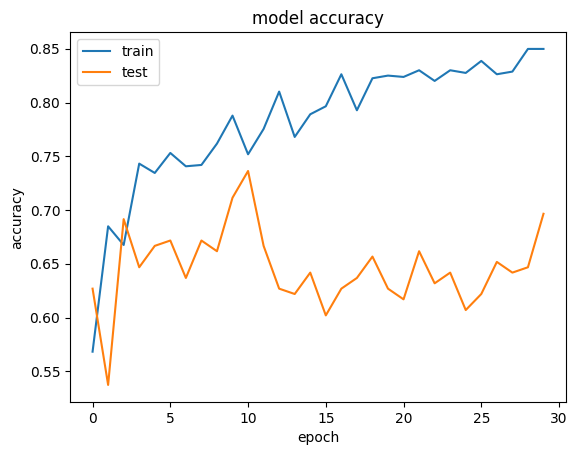

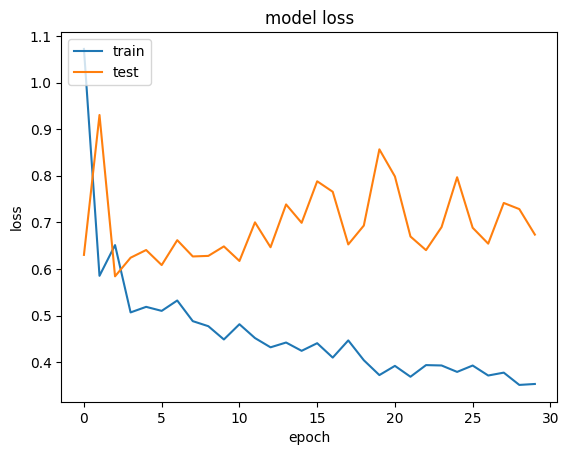

In [10]:
##### list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy'),
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [11]:
model.save("dataset1.h5")

In [12]:
from keras.models import load_model

In [13]:
My_Model = load_model("dataset1.h5")

In [14]:
My_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 2, 2, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │       4,098,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,951,588 (102.81 MB)

 Trainable params: 5,148,802 (19.64 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [15]:
import cv2
image = cv2.imread(r"F:\Final Year Project FINAL\Model Training Files\Rice Seed Dataset\Unhealthy_Images\unhealthy (2).jpg")
image = cv2.resize(image, (128, 128))/255.0
model.predict(image.reshape((1, 128, 128, 3)))
VAR =model.predict(image.reshape((1, 128, 128, 3)))
np.argmax(VAR, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([0], dtype=int64)

In [16]:
classes = train_generator.class_indices
for class_name, class_index in classes.items():
    print(f"Class Name: {class_name}, Class Index: {class_index}")
print(classes)

Class Name: Healthy_Images, Class Index: 0
Class Name: Unhealthy_Images, Class Index: 1
{'Healthy_Images': 0, 'Unhealthy_Images': 1}


In [17]:
classes = train_generator.class_indices
reversed_dict = {value: key for key, value in classes.items()}

In [18]:
reversed_dict[0],reversed_dict[1]

('Healthy_Images', 'Unhealthy_Images')